In [13]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from mud.examples import *
from mud.base import IterativeLinearProblem

In [14]:
# Figure plot defaults
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 24
matplotlib.backend = 'Agg'

<a id='Title'></a>
# <center> Sequential Inversion
_____
   

<center>
    Notebook by: Carlos del-Castillo-Negrete <font color='blue'>cdelcastilo21@gmail.com</font>
</center>

Based off work done in by ([Pilosov 2020](#pilosov_2020)<sup><a href="#4/0/0">1</a></sup>). Original MUD theory published in ([Butler 2021](#butler_mud_2021)<sup><a href="#4/0/0">2</a></sup>).

# Iterative Linear MUD - The Rotation Map Example

In [15]:
seed = 24
numQoI = 10
A, b, y, initial_mean, initial_cov, ref_param = rotation_map(seed=seed)

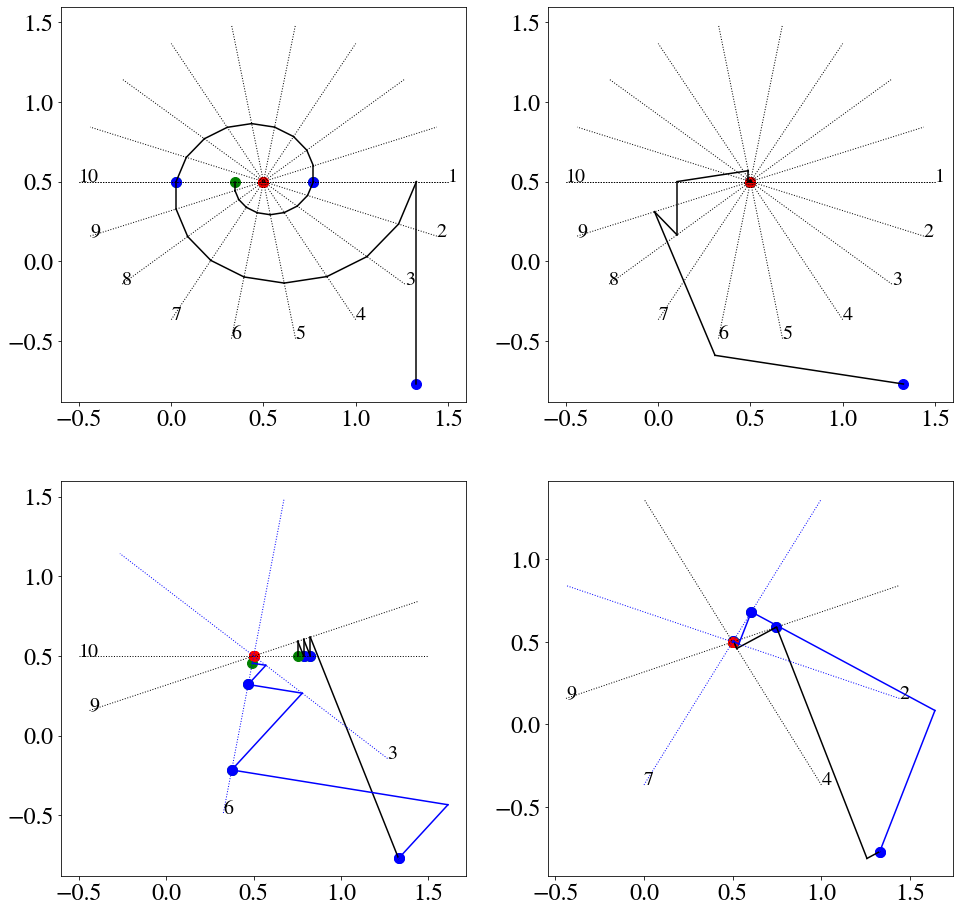

In [16]:
# Iterate over rows of A in order
ordered = IterativeLinearProblem(A, b=b, y=y, initial_mean=initial_mean, cov=initial_cov)
_ = ordered.solve(num_epochs=3)

# Iterate over rows of A in random order
idx_order = np.array([5, 8, 7, 0, 4, 9, 3, 2, 1, 6])
random = IterativeLinearProblem(A, b=b, y=y, initial_mean=initial_mean, cov=initial_cov, idx_order=idx_order)
_ = random.solve(num_epochs=3)

# Random 2 rows
random_2a = IterativeLinearProblem(A, b=b, y=y, initial_mean=initial_mean, cov=initial_cov, idx_order=[8,9])
random_2b = IterativeLinearProblem(A, b=b, y=y, initial_mean=initial_mean, cov=initial_cov, idx_order=[2,5])
_ = random_2a.solve(num_epochs=3)
_ = random_2b.solve(num_epochs=3)

# Orthogonal rows
ortho_a = IterativeLinearProblem(A, b=b, y=y, initial_mean=initial_mean, cov=initial_cov, idx_order=[3,8])
ortho_b = IterativeLinearProblem(A, b=b, y=y, initial_mean=initial_mean, cov=initial_cov, idx_order=[1,6])
_ = ortho_a.solve(num_epochs=3)
_ = ortho_b.solve(num_epochs=3)

# Plot chains and solutions over each epoch
fig, ax = plt.subplots(2,2, figsize=(16,16))
ordered.plot_chain(ref_param, ax=ax[0][0])
random.plot_chain(ref_param, ax=ax[0][1])
random_2a.plot_chain(ref_param, ax=ax[1][0])
random_2b.plot_chain(ref_param, ax=ax[1][0], color="b")
ortho_a.plot_chain(ref_param, ax=ax[1][1])
ortho_b.plot_chain(ref_param, ax=ax[1][1], color="b")

---
# Running Trials

Let us be more formal and perform this experiment for the rotationally-defined $A$ for more choices of initial means.
We also want to experiment with several orderings of indices for our iteration.

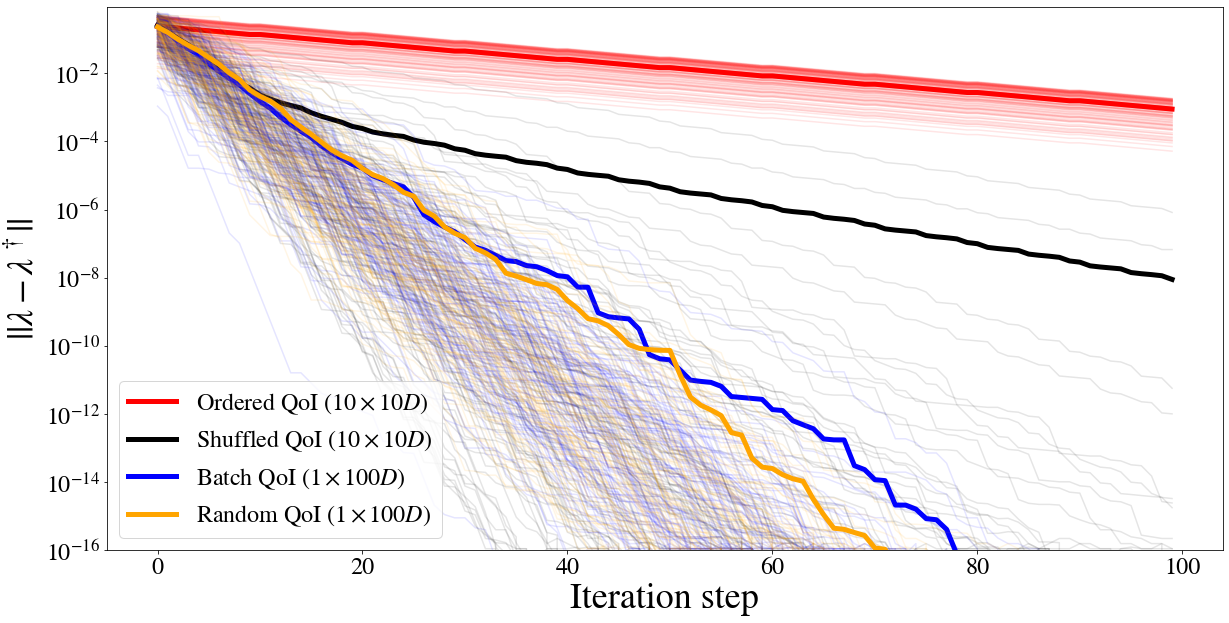

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

seed = 21
numQoI = 10
num_trials = 100
model_eval_budget = 100

rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='ordered', ax=ax, color='r', label='Ordered QoI $(10\\times 10D)$', seed=seed)
rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='shuffle', ax=ax, color='k', label='Shuffled QoI $(10\\times 10D)$', seed=seed)
rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='batch', ax=ax, color='b', label='Batch QoI $(1\\times 100D)$', seed=seed)
rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='random', ax=ax, color='orange', label='Random QoI $(1\\times 100D)$', seed=seed)

_ = ax.set_ylim(1E-16, 9E-1)
_ = ax.legend(loc='lower left')

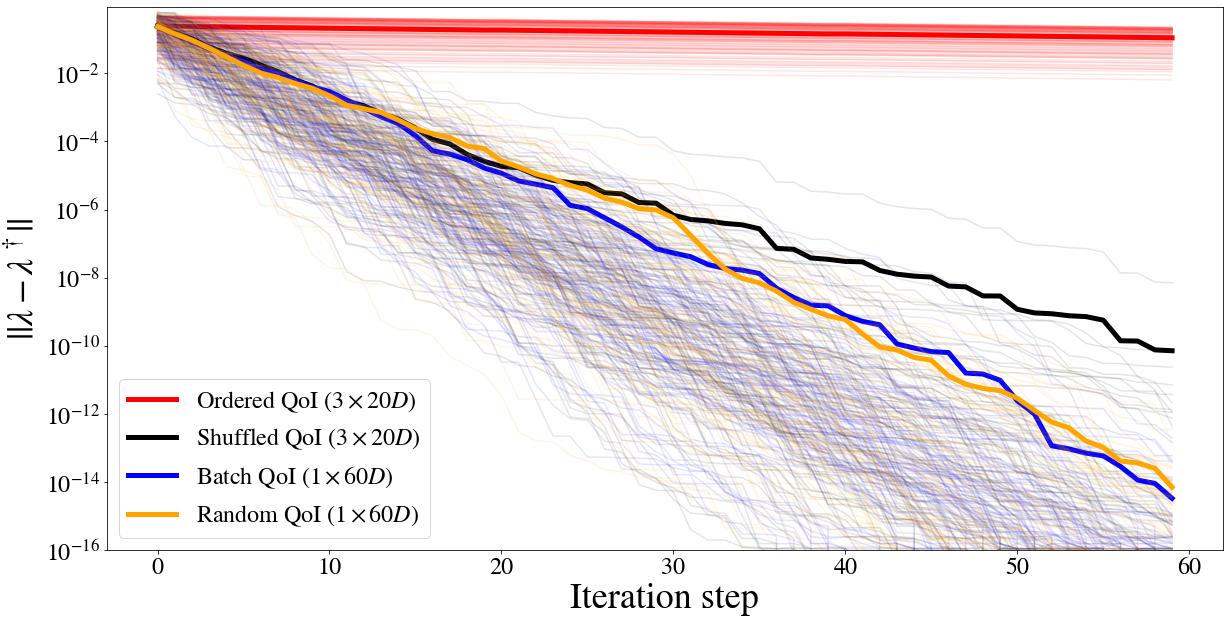

In [32]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

seed = 21
numQoI = 20
num_trials = 100
model_eval_budget = 60

rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='ordered', ax=ax, color='r', label='Ordered QoI $(3\\times 20D)$', seed=seed)
rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='shuffle', ax=ax, color='k', label='Shuffled QoI $(3\\times 20D)$', seed=seed)
rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='batch', ax=ax, color='b', label='Batch QoI $(1\\times 60D)$', seed=seed)
rotation_map_trials(numQoI=numQoI, num_trials=num_trials, model_eval_budget=model_eval_budget,
                    method='random', ax=ax, color='orange', label='Random QoI $(1\\times 60D)$', seed=seed)

_ = ax.set_ylim(1E-16, 9E-1)
_ = ax.legend(loc='lower left')

<a id='References'></a>

# <left> References
______

<a id='pilosov_2020'></a>
 <div class="csl-entry" style="clear: left; ">
    <div class="csl-left-margin" style="float: left; padding-right: 0.5em;text-align: right; width: 1em;">[1]</div><div class="csl-right-inline" style="margin: 0 .4em 0 1.5em;">M. Pilosov, “Computational Advances in Data-Consistent Inversion: Measure-Theoretic Methods for Parameter Estimation,” University of Colorado Denver, 2020. [Online]. Available: <a href="https://github.com/mathematicalmichael/thesis">https://github.com/mathematicalmichael/thesis</a></div>
  </div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adissertation&amp;rft.title=Computational%20Advances%20in%20Data-Consistent%20Inversion%3A%20Measure-Theoretic%20Methods%20for%20Parameter%20Estimation&amp;rft.aufirst=Michael&amp;rft.aulast=Pilosov&amp;rft.au=Michael%20Pilosov&amp;rft.date=2020"></span>
  
<a id='butler_mud_2021'></a>
<div class="csl-entry" style="clear: left; ">
    <div class="csl-left-margin" style="float: left; padding-right: 0.5em;text-align: right; width: 1em;">[2]</div><div class="csl-right-inline" style="margin: 0 .4em 0 1.5em;">T. Butler, M. Pilosov, and T. Y. Yen, “Parameter identification with Maximal Updated Densities: existence, uniqueness, and convergence,” 2021.</div>
</div>
<span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Parameter%20identification%20with%20Maximal%20Updated%20Densities%3A%20existence%2C%20uniqueness%2C%20and%20convergence&amp;rft.aufirst=Troy&amp;rft.aulast=Butler&amp;rft.au=Troy%20Butler&amp;rft.au=Michael%20Pilosov&amp;rft.au=Tian%20Yu%20Yen&amp;rft.date=2021"></span>